In [ ]:
# Library
from skimage import feature
from imutils import paths
import numpy as np
import cv2 as cv
import os 
import pandas as pd
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Function

Metode Preprocessing

In [ ]:
def preprocess(image, image_size=128):
		image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # Ubah mehjadi grayscale
		image = cv.resize(image, (image_size, image_size)) # Resize gambar menjadi suatu ukuran (default = 128)

		image = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1] # Melakukan thresholding dan mengambil hasil gambar thresholding

		return image

Histogram of Oriented Gradients (HOG)

In [ ]:
def quantify_image_hog(image):
  features = feature.hog(image, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")

  return features

Local Binary Patterns (LBP)

In [ ]:
def quantify_image_lbp(image):
  features = feature.local_binary_pattern(image, 24, 8, method="uniform")

  (hist, _) = np.histogram(features.flatten(), bins=np.arange(0, 27), range=(0, 26))

  hist = hist.astype("float")
  hist /= (hist.sum() + 1e-7)

  return hist

Pixel Binary

In [ ]:
def quantify_image_pxb(image):
  
  image = image.flatten()

  features = image / 255.0

  return features

 Split Dataset

In [ ]:
def load_split(path, image_size=128, extraction_method='hog'):
  image_paths = list(paths.list_images(path))
  data = []
  labels = []

  for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]

    image = cv.imread(image_path)
    image = preprocess(image, image_size=image_size)

    if extraction_method == 'hog':
      features = quantify_image_hog(image)
    elif extraction_method == 'lbp':
      features = quantify_image_lbp(image)
    elif extraction_method == 'pxb':
      features = quantify_image_pxb(image)

    data.append(features)
    labels.append(label)

  return (np.array(data), np.array(labels))

Load Dataset

In [ ]:
dataset_dir = '/content/drive/My Drive/Datasets/numbers_dataset'

trainingPath = os.path.join(dataset_dir, "training")
testingPath = os.path.join(dataset_dir, "testing")

Algoritma Classification

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

def classifier_linearsvc(feature_train, feature_test, label_train, label_test):
  ls = LinearSVC(random_state=10)
  ls.fit(feature_train, label_train)
  pred = ls.predict(feature_test)

  print("Linear SVC Classifier")
  print(classification_report(label_test, pred))
  
  print('Accuracy of LinearSVC Classifier on test set: {:.2f}'.format(ls.score(feature_test, label_test)))
  print("F1", f1_score(label_test, pred, average="macro"))
  print("Precision", precision_score(label_test, pred, average="macro"))
  print("Recall", recall_score(label_test, pred, average="macro"))

  return

Logistic Regression



In [ ]:
from sklearn.linear_model import LogisticRegression

def classifier_logreg(feature_train, feature_test, label_train, label_test):
  logreg = LogisticRegression()
  logreg.fit(feature_train, label_train)
  pred = logreg.predict(feature_test)

  print("Logistic Regression Classifier")
  print(classification_report(label_test, pred))

  print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(logreg.score(feature_test, label_test)))
  print("F1", f1_score(label_test, pred, average="macro"))
  print("Precision", precision_score(label_test, pred, average="macro"))
  print("Recall", recall_score(label_test, pred, average="macro"))

  return

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def classifier_randomforest(feature_train, feature_test, label_train, label_test, n_estimator):
  model = RandomForestClassifier(n_estimators=n_estimator, random_state=10)
  model.fit(feature_train, label_train)
  predictions = model.predict(feature_test)

  print("Random Forest Classifier n_estimators:", n_estimator)
  print(classification_report(label_test, predictions))
  print(pd.crosstab(label_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True))

  print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(feature_test, label_test)))
  print("F1", f1_score(label_test, predictions, average="macro")) 
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  return

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def classifier_knn(feature_train, feature_test, label_train, label_test, n_neighbor):
 
  knn = KNeighborsClassifier(n_neighbors=n_neighbor, weights='uniform', algorithm='ball_tree', leaf_size=30)
  knn.fit(feature_train, label_train)
  predictions = knn.predict(feature_test)

  print("KNneighbors Classifier n_neighbors:", n_neighbor)
  print(classification_report(label_test, predictions))

  print('Accuracy of KNN on test set: {:.2f}'.format(knn.score(feature_test, label_test)))
  print("F1", f1_score(label_test, predictions, average="macro")) 
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  return

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def classifier_dtree(feature_train, feature_test, label_train, label_test):
 
  dtree = DecisionTreeClassifier(max_depth=5, random_state=10)
  dtree.fit(feature_train, label_train)
  predictions = dtree.predict(feature_test)

  print("Decision Tree Classifier")
  print(classification_report(label_test, predictions))

  print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtree.score(feature_test, label_test)))
  print("F1", f1_score(label_test, predictions, average="macro")) 
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  return

Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

def classifier_mlp(feature_train, feature_test, label_train, label_test):
 
  mlp = MLPClassifier(solver='lbfgs',alpha=0.001,learning_rate='constant', random_state=10, max_iter=2500)
  mlp.fit(feature_train, label_train)
  predictions = mlp.predict(feature_test)

  print("Neural Network MLP Classifier")
  print(classification_report(label_test, predictions))

  print('Accuracy of Neural Network MLP Classifier on test set: {:.2f}'.format(mlp.score(feature_test, label_test)))
  print("F1", f1_score(label_test, predictions, average="macro")) 
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  return

# Feature extractor HOG dengan image size 128

In [ ]:
resize_image_size = 128
extraction_method = 'hog'

In [ ]:
# Split Dataset

(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print("Data loaded!")

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

Data loaded!


In [ ]:
classifier_linearsvc(feature_train, feature_test, label_train, label_test)

Linear SVC Classifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       300
           1       1.00      1.00      1.00       300
           2       1.00      0.99      0.99       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

Accuracy of LinearSVC Classifier on test set: 0.99
F1 0.9944443950611798
Precision 0.994459062378081
Recall 0.9944444444444445


In [ ]:
classifier_logreg(feature_train, feature_test, label_train, label_test)

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       300
           1       1.00      1.00      1.00       300
           2       1.00      0.98      0.99       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

Accuracy of Logistic Regression Classifier on test set: 0.99
F1 0.9922219259127566
Precision 0.9922803066224118
Recall 0.9922222222222222


In [ ]:
classifier_randomforest(feature_train, feature_test, label_train, label_test, 100)

Random Forest Classifier n_estimators: 100
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       300
           1       1.00      0.99      1.00       300
           2       0.99      0.99      0.99       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

Predicted    0    1    2  All
True                         
0          300    0    0  300
1            0  298    2  300
2            3    0  297  300
All        303  298  299  900
Accuracy of Random Forest on test set: 0.99
F1 0.9944443828691748
Precision 0.9944700155634293
Recall 0.9944444444444445


In [ ]:
classifier_randomforest(feature_train, feature_test, label_train, label_test, 150)

Random Forest Classifier n_estimators: 150
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       300
           1       1.00      0.99      1.00       300
           2       0.99      0.99      0.99       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

Predicted    0    1    2  All
True                         
0          300    0    0  300
1            0  298    2  300
2            3    0  297  300
All        303  298  299  900
Accuracy of Random Forest on test set: 0.99
F1 0.9944443828691748
Precision 0.9944700155634293
Recall 0.9944444444444445


In [ ]:
classifier_randomforest(feature_train, feature_test, label_train, label_test, 200)

Random Forest Classifier n_estimators: 200
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       300
           1       1.00      0.99      1.00       300
           2       0.99      0.99      0.99       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

Predicted    0    1    2  All
True                         
0          300    0    0  300
1            0  298    2  300
2            3    0  297  300
All        303  298  299  900
Accuracy of Random Forest on test set: 0.99
F1 0.9944443828691748
Precision 0.9944700155634293
Recall 0.9944444444444445


In [ ]:
classifier_knn(feature_train, feature_test, label_train, label_test, 3)

KNneighbors Classifier n_neighbors: 3
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       300
           1       0.98      1.00      0.99       300
           2       1.00      0.97      0.98       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

Accuracy of KNN on test set: 0.99
F1 0.987729747068351
Precision 0.9879075876130526
Recall 0.9877777777777778


In [ ]:
classifier_knn(feature_train, feature_test, label_train, label_test, 7)

KNneighbors Classifier n_neighbors: 7
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       300
           1       0.98      0.99      0.99       300
           2       1.00      0.96      0.98       300

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900

Accuracy of KNN on test set: 0.98
F1 0.9843838898475431
Precision 0.9846603765260523
Recall 0.9844444444444443


In [ ]:
classifier_knn(feature_train, feature_test, label_train, label_test, 11)

KNneighbors Classifier n_neighbors: 11
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       300
           1       0.97      1.00      0.98       300
           2       1.00      0.95      0.97       300

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900

Accuracy of KNN on test set: 0.98
F1 0.9821429069844702
Precision 0.9825409230247294
Recall 0.9822222222222222


In [ ]:
classifier_dtree(feature_train, feature_test, label_train, label_test)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       300
           1       0.97      0.94      0.96       300
           2       0.86      0.96      0.91       300

    accuracy                           0.93       900
   macro avg       0.94      0.93      0.93       900
weighted avg       0.94      0.93      0.93       900

Accuracy of Decision Tree Classifier on test set: 0.93
F1 0.9339972881799931
Precision 0.9375437741641237
Recall 0.9333333333333332


In [ ]:
classifier_mlp(feature_train, feature_test, label_train, label_test)

Neural Network MLP Classifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       300
           1       1.00      0.99      0.99       300
           2       1.00      0.99      0.99       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

Accuracy of Neural Network MLP Classifier on test set: 0.99
F1 0.993331308939355
Precision 0.9933768734302677
Recall 0.9933333333333333


# Feature extractor LBP dengan image size 128

In [ ]:
resize_image_size = 128
extraction_method = 'lbp'

In [ ]:
# Split Dataset

(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print("Data loaded!")

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

Data loaded!


In [ ]:
classifier_linearsvc(feature_train, feature_test, label_train, label_test)

Linear SVC Classifier
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       300
           1       0.91      1.00      0.95       300
           2       0.77      0.92      0.84       300

    accuracy                           0.87       900
   macro avg       0.89      0.87      0.87       900
weighted avg       0.89      0.87      0.87       900

Accuracy of LinearSVC Classifier on test set: 0.87
F1 0.8680375353572187
Precision 0.8891593651729268
Recall 0.8711111111111111


In [ ]:
classifier_logreg(feature_train, feature_test, label_train, label_test)

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.95      0.21      0.34       300
           1       0.93      1.00      0.96       300
           2       0.54      0.93      0.69       300

    accuracy                           0.71       900
   macro avg       0.81      0.71      0.66       900
weighted avg       0.81      0.71      0.66       900

Accuracy of Logistic Regression Classifier on test set: 0.71
F1 0.6645240405045216
Precision 0.8099564260410301
Recall 0.7122222222222222


In [ ]:
classifier_randomforest(feature_train, feature_test, label_train, label_test, 100)

Random Forest Classifier n_estimators: 100
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       300
           1       1.00      1.00      1.00       300
           2       0.93      0.98      0.95       300

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900

Predicted    0    1    2  All
True                         
0          280    0   20  300
1            0  299    1  300
2            7    0  293  300
All        287  299  314  900
Accuracy of Random Forest on test set: 0.97
F1 0.9689104507366769
Precision 0.9695769250686137
Recall 0.9688888888888889


In [ ]:
classifier_randomforest(feature_train, feature_test, label_train, label_test, 150)

Random Forest Classifier n_estimators: 150
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       300
           1       0.99      1.00      1.00       300
           2       0.93      0.98      0.95       300

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900

Predicted    0    1    2  All
True                         
0          278    2   20  300
1            0  299    1  300
2            7    0  293  300
All        285  301  314  900
Accuracy of Random Forest on test set: 0.97
F1 0.966611021343904
Precision 0.967305032442361
Recall 0.9666666666666667


In [ ]:
classifier_randomforest(feature_train, feature_test, label_train, label_test, 200)

Random Forest Classifier n_estimators: 200
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       300
           1       1.00      1.00      1.00       300
           2       0.93      0.98      0.95       300

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900

Predicted    0    1    2  All
True                         
0          279    1   20  300
1            0  299    1  300
2            7    0  293  300
All        286  300  314  900
Accuracy of Random Forest on test set: 0.97
F1 0.9677608302792015
Precision 0.9684373870998075
Recall 0.9677777777777777


In [ ]:
classifier_knn(feature_train, feature_test, label_train, label_test, 3)

KNneighbors Classifier n_neighbors: 3
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       300
           1       0.99      0.98      0.99       300
           2       0.91      0.95      0.93       300

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900

Accuracy of KNN on test set: 0.95
F1 0.951236361866641
Precision 0.95169313666502
Recall 0.9511111111111111


In [ ]:
classifier_knn(feature_train, feature_test, label_train, label_test, 7)

KNneighbors Classifier n_neighbors: 7
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       300
           1       0.99      0.99      0.99       300
           2       0.92      0.98      0.95       300

    accuracy                           0.96       900
   macro avg       0.96      0.96      0.96       900
weighted avg       0.96      0.96      0.96       900

Accuracy of KNN on test set: 0.96
F1 0.961152587547207
Precision 0.9625279078740125
Recall 0.9611111111111111


In [ ]:
classifier_knn(feature_train, feature_test, label_train, label_test, 11)

KNneighbors Classifier n_neighbors: 11
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       300
           1       0.99      0.99      0.99       300
           2       0.92      0.97      0.94       300

    accuracy                           0.96       900
   macro avg       0.96      0.96      0.96       900
weighted avg       0.96      0.96      0.96       900

Accuracy of KNN on test set: 0.96
F1 0.9600448923176236
Precision 0.9608258086518956
Recall 0.96


In [ ]:
classifier_dtree(feature_train, feature_test, label_train, label_test)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       300
           1       1.00      0.98      0.99       300
           2       0.89      0.95      0.92       300

    accuracy                           0.94       900
   macro avg       0.95      0.94      0.94       900
weighted avg       0.95      0.94      0.94       900

Accuracy of Decision Tree Classifier on test set: 0.94
F1 0.9436167697037262
Precision 0.9450729627807837
Recall 0.9433333333333334


In [ ]:
classifier_mlp(feature_train, feature_test, label_train, label_test)

Neural Network MLP Classifier
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       300
           1       1.00      1.00      1.00       300
           2       0.94      0.96      0.95       300

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900

Accuracy of Neural Network MLP Classifier on test set: 0.97
F1 0.9678055188328122
Precision 0.9679843707298338
Recall 0.9677777777777777


Dari data di atas, ditemukan hasil terbaik untuk masing-masing algoritma pada HOG dan LBP :

HOG - image size 128, menggunakan KNN(k=3) memiliki akurasi 99% & f1 score 98%

LBP - image size 128, menggunakan Random Forest (n=150) memiliki akurasi 97% & f1 score 96%

Dengan metode ekstraksi dan image size yang berbeda-beda menghasilkan keakurasian yang berbeda pula, dapat disimpulkan bahwa hasil keakurasian tergantung dengan objek /teksture di dalam gambar yang akan di klasifikasikan

# Input Number

## Input Number 0

In [ ]:
image = cv.imread('/content/drive/My Drive/Datasets/numbers_dataset/number0.jpg')

image_orig = image.copy()

image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

image_thresh = cv.threshold(image_gray, 140, 255, cv.THRESH_BINARY)[1]

thresholding_result = cv.bitwise_not(image_thresh)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(9,9))
dilation = cv.dilate(thresholding_result,kernel,iterations = 2)

contours, hierarchy = cv.findContours(thresholding_result, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

data_area = []
for index, contour in enumerate(contours):
  x, y, w, h = cv.boundingRect(contour)
  area = cv.contourArea(contour)
  data_area.append([index, area, w, h])

df_area = pd.DataFrame(data_area)
df_area.columns = ['index', 'area', 'width', 'height']
df_sort = df_area.sort_values(by=['area'],ascending=False)
df_sort.head(15)

,index,area,width,height
1838,1838,1495994.0,1286,1558
1892,1892,49668.0,230,287
1898,1898,44136.5,238,238
1899,1899,39492.5,191,275
1893,1893,38186.0,189,269
1918,1918,12420.5,209,226
1920,1920,10755.5,237,262
1191,1191,6611.5,163,101
573,573,5665.0,109,130
1330,1330,2040.0,59,99


In [ ]:
# os.chdir('/content/drive/My Drive/Datasets/numbers_dataset')

os.listdir('.')

['num2_0.png',
 'num2_1.png',
 'num2_2.png',
 'num2_3.png',
 'num2_4.png',
 'num2_5.png',
 'num2_6.png',
 'num2_7.png',
 'num2_8.png',
 'num2_9.png']

In [ ]:
os.chdir('/content/drive/My Drive/Datasets/numbers_dataset/testingtemp')

dirName = '0'
os.makedirs(dirName)

In [ ]:
os.listdir('.')

In [ ]:
test = df_area['area']
array = []
directory_save = '/content/drive/My Drive/Datasets/numbers_dataset/testingtemp/0'

for i, v in enumerate(test):
  if test[i] > 2000:
    array.append(i)

array.sort()
print(array)
os.chdir(directory_save)

for i, v in enumerate(array):
  x, y, w, h = cv.boundingRect(contours[v])
  num0 = image[y:y+h, x:x+w]
  image_resize = cv.resize(num0, (28, 28), interpolation =cv.INTER_AREA)
  cv.imwrite('num0_{}.png'.format(i), image_resize)

print(os.listdir(directory_save))

## Input Number 1

In [ ]:
image = cv.imread('/content/drive/My Drive/Datasets/numbers_dataset/number1.jpg')

image_orig = image.copy()

image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

image_thresh = cv.threshold(image_gray, 140, 255, cv.THRESH_BINARY)[1]

thresholding_result = cv.bitwise_not(image_thresh)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(9,9))
dilation = cv.dilate(thresholding_result,kernel,iterations = 2)

contours, hierarchy = cv.findContours(thresholding_result, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

data_area = []
for index, contour in enumerate(contours):
  x, y, w, h = cv.boundingRect(contour)
  area = cv.contourArea(contour)
  data_area.append([index, area, w, h])

df_area = pd.DataFrame(data_area)
df_area.columns = ['index', 'area', 'width', 'height']
df_sort = df_area.sort_values(by=['area'],ascending=False)
df_sort.head(15)

,index,area,width,height
4,4,7545.5,32,392
2,2,7010.0,36,321
11,11,6834.5,42,328
15,15,6129.0,31,293
20,20,5754.5,32,344
12,12,5334.5,38,279
16,16,5059.0,30,293
27,27,4239.0,26,323
21,21,3404.5,22,275
26,26,3208.0,27,273


In [ ]:
os.chdir('/content/drive/My Drive/Datasets/numbers_dataset/testingtemp')

dirName = '1'
os.makedirs(dirName)

In [ ]:
test = df_area['area']
array = []
directory_save = '/content/drive/My Drive/Datasets/numbers_dataset/testingtemp/1'

for i, v in enumerate(test):
  if test[i] > 2000:
    array.append(i)

array.sort()
print(array)
os.chdir(directory_save)

for i, v in enumerate(array):
  x, y, w, h = cv.boundingRect(contours[v])
  num1 = image[y:y+h, x:x+w]
  image_resize = cv.resize(num1, (28, 28), interpolation =cv.INTER_AREA)
  cv.imwrite('num1_{}.png'.format(i), image_resize)

print(os.listdir(directory_save))

[2, 4, 11, 12, 15, 16, 20, 21, 26, 27]
['num1_0.png', 'num1_1.png', 'num1_2.png', 'num1_3.png', 'num1_4.png', 'num1_5.png', 'num1_6.png', 'num1_7.png', 'num1_8.png', 'num1_9.png']


## Input Number 2

In [ ]:
image = cv.imread('/content/drive/My Drive/Datasets/numbers_dataset/number2.jpg')

image_orig = image.copy()

image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

image_thresh = cv.threshold(image_gray, 140, 255, cv.THRESH_BINARY)[1]

thresholding_result = cv.bitwise_not(image_thresh)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(9,9))
dilation = cv.dilate(thresholding_result,kernel,iterations = 2)

contours, hierarchy = cv.findContours(thresholding_result, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

data_area = []
for index, contour in enumerate(contours):
  x, y, w, h = cv.boundingRect(contour)
  area = cv.contourArea(contour)
  data_area.append([index, area, w, h])

df_area = pd.DataFrame(data_area)
df_area.columns = ['index', 'area', 'width', 'height']
df_sort = df_area.sort_values(by=['area'],ascending=False)
df_sort.head(15)

,index,area,width,height
51,51,18355.0,283,331
94,94,17785.0,284,337
69,69,15592.5,291,280
52,52,15343.0,272,296
111,111,14094.0,248,331
90,90,13344.0,252,314
70,70,13311.5,258,323
107,107,11739.0,229,295
121,121,11380.5,250,291
117,117,8539.0,191,269


In [ ]:
os.chdir('/content/drive/My Drive/Datasets/numbers_dataset/testingtemp')

dirName = '2'
os.makedirs(dirName)

In [ ]:
test = df_area['area']
array = []
directory_save = '/content/drive/My Drive/Datasets/numbers_dataset/testingtemp/2'

for i, v in enumerate(test):
  if test[i] > 2000:
    array.append(i)

array.sort()
print(array)
os.chdir(directory_save)

for i, v in enumerate(array):
  x, y, w, h = cv.boundingRect(contours[v])
  num2 = image[y:y+h, x:x+w]
  image_resize = cv.resize(num2, (28, 28), interpolation =cv.INTER_AREA)
  cv.imwrite('num2_{}.png'.format(i), image_resize)

print(os.listdir(directory_save))

[51, 52, 69, 70, 90, 94, 107, 111, 117, 121]
['num2_0.png', 'num2_1.png', 'num2_2.png', 'num2_3.png', 'num2_4.png', 'num2_5.png', 'num2_6.png', 'num2_7.png', 'num2_8.png', 'num2_9.png']


# Feature extractor HOG dengan image size 128

In [ ]:
dataset_dir = '/content/drive/My Drive/Datasets/numbers_dataset'

trainingPath = os.path.join(dataset_dir, "training")
testingPath = os.path.join(dataset_dir, "testingtemp")

In [ ]:
resize_image_size = 128
extraction_method = 'hog'

In [ ]:
# Split Dataset

(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print("Data loaded!")

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

Data loaded!


In [ ]:
classifier_linearsvc(feature_train, feature_test, label_train, label_test)

Linear SVC Classifier
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.71      0.50      0.59        10
           2       0.62      1.00      0.77        10

    accuracy                           0.63        30
   macro avg       0.64      0.63      0.61        30
weighted avg       0.64      0.63      0.61        30

Accuracy of LinearSVC Classifier on test set: 0.63
F1 0.6093514328808446
Precision 0.6369047619047619
Recall 0.6333333333333333


In [ ]:
classifier_logreg(feature_train, feature_test, label_train, label_test)

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.75      0.60      0.67        10
           2       0.67      1.00      0.80        10

    accuracy                           0.67        30
   macro avg       0.66      0.67      0.65        30
weighted avg       0.66      0.67      0.65        30

Accuracy of Logistic Regression Classifier on test set: 0.67
F1 0.6457516339869281
Precision 0.6626984126984127
Recall 0.6666666666666666


In [ ]:
classifier_knn(feature_train, feature_test, label_train, label_test, 3)

KNneighbors Classifier n_neighbors: 3
              precision    recall  f1-score   support

           0       0.50      0.30      0.37        10
           1       0.42      0.80      0.55        10
           2       1.00      0.50      0.67        10

    accuracy                           0.53        30
   macro avg       0.64      0.53      0.53        30
weighted avg       0.64      0.53      0.53        30

Accuracy of KNN on test set: 0.53
F1 0.5311302681992337
Precision 0.6403508771929824
Recall 0.5333333333333333


In [ ]:
classifier_randomforest(feature_train, feature_test, label_train, label_test, 100)

Random Forest Classifier n_estimators: 100
              precision    recall  f1-score   support

           0       0.40      0.20      0.27        10
           1       0.50      0.10      0.17        10
           2       0.39      0.90      0.55        10

    accuracy                           0.40        30
   macro avg       0.43      0.40      0.33        30
weighted avg       0.43      0.40      0.33        30

Predicted  0  1   2  All
True                    
0          2  0   8   10
1          3  1   6   10
2          0  1   9   10
All        5  2  23   30
Accuracy of Random Forest on test set: 0.40
F1 0.32626262626262625
Precision 0.43043478260869567
Recall 0.4000000000000001


In [ ]:
classifier_dtree(feature_train, feature_test, label_train, label_test)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.25      0.10      0.14        10
           2       0.33      0.70      0.45        10

    accuracy                           0.37        30
   macro avg       0.39      0.37      0.33        30
weighted avg       0.39      0.37      0.33        30

Accuracy of Decision Tree Classifier on test set: 0.37
F1 0.33149001536098316
Precision 0.39444444444444443
Recall 0.3666666666666667


In [ ]:
classifier_mlp(feature_train, feature_test, label_train, label_test)

Neural Network MLP Classifier
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.67      0.40      0.50        10
           2       0.62      1.00      0.77        10

    accuracy                           0.60        30
   macro avg       0.60      0.60      0.57        30
weighted avg       0.60      0.60      0.57        30

Accuracy of Neural Network MLP Classifier on test set: 0.60
F1 0.5712250712250713
Precision 0.5972222222222222
Recall 0.6


In [ ]:
testing_paths = list(paths.list_images(testingPath))
images = []

model = LogisticRegression()
model.fit(feature_train, label_train)

for testing_path in testing_paths[:25]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=resize_image_size)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = model.predict([features])
	label = le.inverse_transform(preds)[0]

	color == (255, 0, 0)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

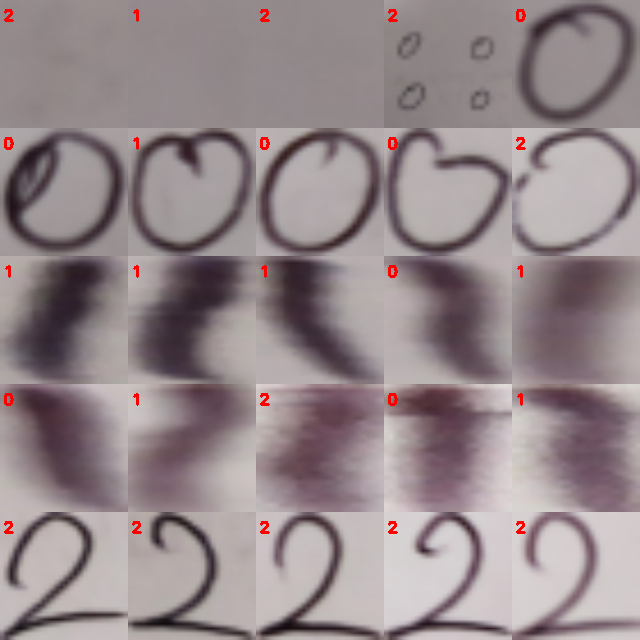

In [ ]:
from imutils import build_montages

montage = build_montages(images, (128,128), (5, 5))[0]

cv2_imshow(montage)

Pada percobaan feature extractor HOG dengan image size 128, terdapat perubahan yang cukup berpengaruh. Data yang semula memiliki rata-rata nilai testing >=90% kini turun menjadi >= 70%.

Dapat diambil kesimpulan, bahwa data testing yang dimasukan berpengaruh pada tingkat hasil akurasi yang didapatkan. Bila dilihat dari gambar pada testing path, data testing yang dimasukan cukup buruk sebagai data.

Jadi, tergantung pada data yang ditambahkan/digunakan seperti apa, apakah data tersebut baik, dimana gambar dapat dibedakan background dan modelnya, apakah intensitas warnanya cukup jelas serta apakah gambar memiliki noise atau tidak.